### 2標本問題
#### 対照実験
ある薬物の副作用を調べる目的で、生後3週間のラット20匹をランダムに10匹ずつの2群に分け、一方に薬物を、他方に薬物の入っていない溶媒のみを一定期間投与したのち、体重を測定し
、次のようのデータを得た。薬物が体重を減少させたといえるか。

In [3]:
import numpy as np

treatment = np.array([39.1, 40.5, 38.0, 40.1, 46.7, 42.3, 45.8, 36.3, 43.2, 43.3])
control =  np.array([44.7, 39.1, 37.6, 40.0, 37.9, 34.8, 38.4, 30.3, 40.2, 35.2])

この場合、薬物を与られた群を処理群(treatment group)、そうでない方を対象群(control group)と呼ぶ。
また、処理群と対象群を比較するために計画された実験を対照実験という。
一般に、2つの条件のもとでの観測値の分布を比較する問題を2標本問題という。
2組のデータ$y_{1j}(j=1,\cdots,r_1),y_{2}(j=1,\cdots,r_2)$がそれぞれ正規母集団$N(\mu_1,\sigma_1^2),N(\mu_2,\sigma_2^2)$からの独立な観測値であるときの比較について述べる。
比較の基本となる統計量は、各標本の平均
$$
\bar{y_{1・}}=\sum_jy_{1j}/r_1,\hspace{3mm}\bar{y_{2・}}=\sum_jy_{2j}/r_2
$$
と平方和
$$
S_1=\sum_j(y_{1j}-\bar{y}_{1・})^2,\hspace{3mm}S_2=\sum_j(y_{2j}-\bar{y}_{2・})^2
$$
である。
ここで、$\bar{y}_1,\bar{y}_2$はそれぞれ$N(\mu_1,\sigma_1^2/r_1),N(\mu_2,\sigma_2^2/r_2)$に従う。
また、$S_1/\sigma_1^2,S_2/\sigma_2^2$はそれらと独立にそれぞれ自由度$r_1-1,r_2-1$の$\chi^2$分布に従う。
母分散$\sigma_1^2,\sigma_2^2$は推定量
$$
\hat{\sigma_1^2}=S_1/(r_1-1),\hspace{3mm}\hat{\sigma_2^2}=S_2/(r_2-1)
$$
で不偏に推定される。

In [8]:
r1 = len(treatment)
r2 = len(control)

y1_bar = np.mean(treatment)
y2_bar = np.mean(control)

S1 = np.sum((treatment-y1_bar)**2)
S2 = np.sum((control-y2_bar)**2)

sigma21_hat = S1 / (r1-1)
sigma22_hat = S2 / (r2-1)

print('treatment\n')
print('  y_bar', y1_bar)
print('  S', S1)
print('  sigma2_hat', sigma21_hat)
print('\ncontrol\n')
print('  y_bar', y2_bar)
print('  S', S2)
print('  sigma2_hat', sigma22_hat)

treatment

  y_bar 41.529999999999994
  S 100.301
  sigma2_hat 11.144555555555556

control

  y_bar 37.81999999999999
  S 132.31600000000003
  sigma2_hat 14.701777777777782


#### 母平均の差の検定
2つの母平均が等しいという帰無仮説
$$
H_0:\mu_1=\mu_2
$$
を検定する。
対立仮説としては通常次のものが考えられる。
両側対立仮説　$H_1:\mu_1\neq\mu_2$
片側対立仮説　$H_2:\mu_1>\mu_2(またはH_2':\mu_1<\mu_2)$

以下では、データの総数を$n=r_1+r_2$とおく。
#### 母分散既知のとき
標本平均の差$\bar{y}_{1・}-\bar{y}_{2・}$は平均$\mu_1-\mu_2$、分散$(\sigma_1^2/r_1)+(\sigma_2^2/r_2)$の正規分布に従うので、仮説が正しければ
$$
z=\frac{\bar{y}_{1・}-\bar{y}_{2・}}{\sqrt{(\sigma_1^2/r_1)+(\sigma_2^2/r_2)}}
$$
は標準正規分布に従う。
$\sigma_1^2,\sigma_2^2$が既知ならば$z$が計算できて、有意水準$\alpha$の棄却域は
対立仮説が$H_1$のとき、$|z|>z_{\alpha/2}$
対立仮説が$H_2$のとき、$z>z_{\alpha}$($H_2'$のとき、$z<-z_{\alpha})$
で与えられる。

#### 母分散未知であるが、等しいと考えられるとき
母分散$\sigma_1^2,\sigma_2^2$が未知でも、$\sigma_1^2=\sigma_2^2$と考えられるときは、その共通の値を$\sigma^2$とおく。
$\bar{y}_{1・}-\bar{y}_{2・}$は平均$\mu_1-\mu_2$、分散$(1/r_1+1/r_2)\sigma^2$の正規分布に従う。
他方、$(S_1+S_2)/\sigma^2$が自由度$(r_1-1)+(r_2-1)=n-2$の$\chi^2$分布に従うので、$\sigma^2$は併合推定量
$$
\hat{\sigma}^2=(S_1+S_2)/(n-2)
$$
で不偏に推定される。
したがって、仮説が正しければ
$$
t=\frac{\bar{y}_{1・}-\bar{y}_{2・}}{\sqrt{\bigl(\frac{1}{r_1}+\frac{1}{r_2}\bigr)\hat{\sigma}^2}}
$$
の分布は自由度$n-2$の$t$分布となる。これより有意水準$\alpha$の棄却域は
対立仮説が$H_1$のとき、$|t|>t_{\alpha/2}(n-2)$
対立仮説が$H_2$のとき、$t>t_{\alpha}(n-2)$($H_2'$のとき、$t<-t_{\alpha}(n-2))$
で与えられる。

#### 母分散未知で、等しいとも考えられないとき
母分散既知の場合の$\sigma_1^2,\sigma_2^2$を推定量で置き換えた
$$
t'=\frac{\bar{y}_{1・}-\bar{y}_{2・}}{\sqrt{(\hat{\sigma_1}^2/r_1)+(\hat{\sigma_2}^2/r_2)}}
$$
の、仮説の下での分布は、自由度
$$
\frac{\{(\sigma_1^2/r_1)+(\sigma_2^2/r_2) \}^2}{\sigma_1^4/r_1^2(r_1-1)+\sigma_2^4/r_2^2(r_2-1)}
$$
の$t$分布で近似できることが示される。
これらの$\sigma_1^2,\sigma_2^2$を推定量で置き換えたものを
$$
\nu^*=\frac{\{(\hat{\sigma}_1^2/r_1)+(\hat{\sigma}_2^2/r_2) \}^2}{\hat{\sigma}_1^4/r_1^2(r_1-1)+\hat{\sigma}_2^4/r_2^2(r_2-1)}
$$
とし、$\nu$を$\nu^*$に最も近い整数として、棄却域を
対立仮説が$H_1$のとき、$|t'|>t_{\alpha/2}(\nu)$
対立仮説が$H_2$のとき、$t'>t_{\alpha}(\nu)$($H_2'$のとき、$t'<-t_{\alpha}(\nu))$
とすると、近似的な有意水準$\alpha$の検定が得られる。これをウェルチの検定と呼ぶ。

In [21]:
from scipy import stats

print('sigma1^2', sigma21_hat)
print('sigma2^2', sigma22_hat)

sigma2 = (S1+S2)/(r1+r2-2)
print('sigma2(pooled)', sigma2)

t = (y1_bar - y2_bar) / np.sqrt((1/r1+1/r2)*sigma2)
print('t-value', t)

print('p-value', stats.t.pdf(t, df=r1+r2-2))

sigma1^2 11.144555555555556
sigma2^2 14.701777777777782
sigma2(pooled) 12.923166666666667
t-value 2.3076739049689503
p-value 0.03354292380393513


#### 母平均の差の推定
$\mu_1-\mu_2$の不偏推定量は$\bar{y}_{1・}-\bar{y}_{2・}$であり、その分散は$(\sigma_1^2/r_1)+(\sigma_2^2/r_2)$である。
区間推定では、検定に対応して3通りの場合が生じる。
たとえば、信頼係数$1-\alpha$の両側信頼区間の限界はそれぞれ次式で与えられる。
1. 母分散既知のとき
$$
(\bar{y}_{1・}-\bar{y}_{2・})±z_{\alpha/2}\sqrt{(\sigma_1^2/r_1)+(\sigma_2^2/r_2)}
$$

2. 母分散未知であるが、等しいと考えられるとき
$$
(\bar{y}_{1・}-\bar{y}_{2・})±t_{\alpha/2}(n-2)\sqrt{(1/r_1+1/r_2)\hat{\sigma}^2}
$$

3. 母分散未知で、等しいとも考えられないとき
$$
(\bar{y}_{1・}-\bar{y}_{2・})±t_{\alpha/2}(\nu)\sqrt{(\hat{\sigma_1}^2/r_1)+(\hat{\sigma_2}^2/r_2)}
$$

#### 分散比の推測
2つの母分散が等しいという仮説(等分散仮説)
$$
H_0:\sigma_1^2=\sigma_2^2
$$
の検定は、分散比そのものに関心がある場合のほか、平均の差の推測において等分散を仮定できるかどうかの判定に用いられることが多い。
$S_i/\sigma_i^2$は自由度$r_i-1$の$\chi^2$分布に従うので、仮説の下で
$$
F=\frac{\hat{\sigma_1}^2}{\hat{\sigma_2}^2}=\frac{S_1/(r_1-1)}{S_2/(r_2-1)}
$$
の分布は自由度$\nu_1=r_1-1,\nu_2=r_2-1$の$F$分布となる。したがって、
対立仮説が$\sigma_1^2\neq\sigma_2^2$のとき$F>F_{\alpha/2}(\nu_1,\nu_2)$または$F<1/F_{\alpha/2}(\nu_2,\nu_1)$
対立仮説が$\sigma_1^2>\sigma_2^2$のとき$F>F_{\alpha}(\nu_1,\nu_2)$
対立仮説が$\sigma_1^2<\sigma_2^2$のとき$F<1/F_{\alpha}(\nu_2,\nu_1)$
を棄却域とすることで、有意水準$\alpha$の検定が得られる。なお、$F_{1-\alpha}(\nu_1,\nu_2)=1/F_{\alpha}(\nu_2,\nu_1)$に注意する。
分散比$\sigma_1^2/\sigma_2^2$に対する信頼区間$1-\alpha$の両側信頼区間は、
$$
[F/F_{\alpha/2}(\nu_1,\nu_2),F・F_{\alpha/2}(\nu_2,\nu_1)]
$$
と表される。

In [41]:
F = sigma21_hat/sigma22_hat
print('F', F)

p_value = stats.f.pdf(F, r1-1,r2-1)
print('p-value', p_value)

upper_p = stats.f.ppf(q=0.975, dfn=r1-1, dfd=r2-1)

print('信頼区間')
print('[',F/upper_p,F*upper_p, ']')


F 0.7580413555427913
p-value 0.7045233361075518
信頼区間
[ 0.1882867499902394 3.0518700691521876 ]


### 1元配置分散分析
#### 1元配置とそのモデル
3つ以上の母集団平均$\mu_1,\mu_2,\cdots,\mu_a(a\geq3)$の比較($k$標本問題)には以下の分散分析(ANOVA)が基本的な役割を果たす。

化学工場で製品中のある成分の含有量を多くするため、反応温度を
$$
A_1:50℃,\hspace{5mm}A_2:55℃,\hspace{5mm}A_3:60℃,\hspace{5mm}A_4:65℃
$$
の4段階に変え、つくられた1kg中の含有量を調べた、各反応温度で5回ずつ実験を行った結果は次のようになった。

In [47]:
import pandas as pd

A1 = np.array([77.4, 78.2, 78.1, 77.8, 77.9])
A2 = np.array([78.3, 78.2, 78.4, 77.3, 79.1])
A3 = np.array([79.2, 79.3, 79.1, 78.2, 79.3])
A4 = np.array([78.9, 78.8, 78.1, 78.1, 78.9])

df = pd.DataFrame({'A1':A1,'A2':A2,'A3':A3,'A4':A4})
print(df)

print(df.agg({'sum', 'mean'}))

     A1    A2    A3    A4
0  77.4  78.3  79.2  78.9
1  78.2  78.2  79.3  78.8
2  78.1  78.4  79.1  78.1
3  77.8  77.3  78.2  78.1
4  77.9  79.1  79.3  78.9
          A1      A2      A3      A4
sum   389.40  391.30  395.10  392.80
mean   77.88   78.26   79.02   78.56


実験結果に影響を及ぼすと考えて実験で取り上げるものを因子と呼び、因子に対して与える条件を水準を呼ぶ。
この実験は反応温度という単一の因子を持つ1因子実験であり、この因子は4つの水準を持つ。
2因子以上の場合は各因子の水準の組合せが実験されることになるが、このような具体的な実験条件のことを処理と呼ぶ。
なお、各水準での繰返しは同じ回数でなくてもよい。

いま、因子を$A$、その$a$個の水準を$A_1,\cdots,A_a$、各水準での繰り返し数を$r_1,\cdots,r_a$とする。
$A_i$水準の$j$番目のデータを$y_{ij}$と表し、データの構造として次のモデルを想定する。
$$
y_{ij}=\mu_i+\varepsilon_{ij},\hspace{5mm}i=1,2,\cdots,a;j=1,\cdots,\cdots,r_i
$$

ここで、母数$\mu_i$は第$i$水準に固有な平均であり、それに加わる実験誤差$\varepsilon_{ij}$はすべて互いに独立に$N(0,\sigma^2)$に従うものとする。この共通な分散$\sigma^2$は未知である。
いま、データの総数を$N=\sum r_i$とし、繰り返し数$r_i$の重みでの$\mu_i$の加重平均
$$
\mu=\sum r_i\mu_i/n
$$
を一般平均と呼ぶ。
各水準の平均からこれを引いたものが、その正味の効果となる。こうして、
$$
\alpha_i=\mu_i-\mu_j,\hspace{5mm}i=1,2,\cdots,a
$$
を$A_i$水準の効果と呼ぶ。なお、$\sum r_i\alpha_i=0$が成立する。
この$\mu$と$\alpha_i$を用いると、
$$
y_{ij}=\mu + \alpha_i + \varepsilon_{ij},\hspace{3mm}i=1,2,\cdots,a;j=1,\cdots,r_i
$$
と表される。これは、(共通の効果)+(第$i$水準の効果)+(それ以外の誤差)という形になっている。


In [53]:
df_mean = df.mean()

print('mu(平均)')
print(df_mean)
print('alpha(効果)')
print(df_mean - df_mean.mean())

mu(平均)
A1    77.88
A2    78.26
A3    79.02
A4    78.56
dtype: float64
alpha(効果)
A1   -0.55
A2   -0.17
A3    0.59
A4    0.13
dtype: float64


#### 分散分析
分散分析は、因子$A$のすべての水準の平均が等しいという帰無仮説
$$
H_0:\mu_1=\mu_2=\cdots=\mu_a
$$
あるいは、これと同等な帰無仮説
$$
H_0:\alpha_1=\alpha_2=\cdots=\alpha_a=0
$$
を検定する方法である。
繰返し数が一定でない1元配置モデルに関する推測は以下のようになる。
なお、
$$
y_{i・}=\sum_jy_{ij},\hspace{3mm}y_{・・}=\sum_i\sum_jy_{ij}\\
\bar{y}_{i・}=y_{i・}/r_i,\hspace{3mm}\bar{y}_{・・}=y_{・・}/n
$$
を用いてある。
データに1元配置をモデルをあてはめたときの残差平方和は
$$
\begin{align}
S_e&=\sum_i\sum_j(y_{ij}-\bar{y}_{i・})^2\\
&=\sum_i\sum_jy_{ij}^2-\sum_iy_{i・}^2/r_i
\end{align}
$$
であり、$S_e/\sigma^2$は自由度$\nu_e=n-a$の$\chi^2$分布に従う。
また、仮説$H_0:\mu_1=\mu_2=\cdots=\mu_a$のもとでの、つまり、モデル$y_{ij}=\mu+\varepsilon_{ij}$をあてはめたときの残差平方和は、$\mu$を総平均$\bar{y}_{・・}$で推定して
$$
S_T=\sum_i\sum_j(y_{ij}-\bar{y}_{・・})^2=\sum_i\sum_jy_{ij}^2-y_{・・}^2/n
$$
となる。
こうして、仮説$H_0$を設けたことによる残差平方和の増加分は、
$$
\begin{align}
S_A&=S_T-S_e\\
&=\sum_i y_{i・}^2/r_i-y_{・・}^2/n=\sum_ir_i(\bar{y}_{i・}-\bar{y}_{・・})^2
\end{align}
$$
となる。
$S_A$は$S_e$と独立で、仮説が正しければ自由度$\nu_A=a-1$の$\chi^2$分布に従う。
したがって、仮説の下で
$$
F=\frac{S_A/\nu_A}{S_e/\nu_e}
$$
が自由度$\nu_A,\nu_e$の$F$分布$F(\nu_A,\nu_e)$に従うので、このことを用いて仮説が検定できる。
これが分散分析検定(ANOVA test)である。

#### 平方和の分解
データ全体の変動の大きさは、総平方和と呼ばれる$S_T$によって表現されると考えられる。
総平方和を上記の「水準変更による変動」$S_A$と「同一条件下の変動」$S_e$に分解する。
$S_T$を
$$
y_{ij}-\bar{y}_{・・}=(\bar{y}_{i・}-\bar{y}_{・・})+(y_{ij}-\bar{y}_{i・})
$$
と表し、両辺を2乗して加えると、交差項の和は
$$
\sum_i\sum_j(\bar{y}_{i・}-\bar{y}_{・・})(y_{ij}-\bar{y}_{i・})=\sum_i\{(\bar{y}_{i・}-\bar{y}_{・・})\sum_j(y_{ij}-\bar{y}_{i・}) \}=0
$$
となるから
$$
\sum_i\sum_j(y_{ij}-\bar{y}_{・・})^2=\sum_ir_i(\bar{y}_{i・}-\bar{y}_{・・})^2+\sum_i\sum_j(y_{ij}-\bar{y}_{i・})^2
$$
右辺第1項が$S_A$であり、水準の変更にともなうデータの変動の大きさを表し、級間平方和と呼ばれる。
右辺第2項が$S_e$であり、同一実験条件でのデータの変動の大きさを表し、誤差平方和と呼ばれる。
$$
S_T=S_e+S_A
$$
を平方和の分解と呼ぶ。

#### 平方和の計算
分散分析検定のための平方和$S_A,S_e$の計算は、修正項と呼ばれる
$$
CT=y_{・・}^2/n
$$
を最初に求め
$$
S_T=\sum_i\sum_jy_{ij}^2-CT\\
S_A=\sum_iy_{i・}^2/r_i-CT\\
S_e=S_T-S_A
$$
の順に求める方が簡単である。

In [68]:
CT = df.sum().sum()**2 / np.size(df)
print('CT: ', CT)

ST = np.sum(np.sum(df**2)) - CT
print('ST: ', ST)

SA = np.sum(np.sum(df)**2 / len(df)) - CT
print('SA: ', SA)

Se = ST - SA
print('Se: ', Se)

CT:  123025.29799999998
ST:  7.102000000028056
SA:  3.482000000018161
Se:  3.6200000000098953


In [80]:
ST = np.sum(np.sum((df - df.mean().mean())**2))
SA = np.sum(len(df)*(df.mean() - df.mean().mean())**2)
Se = np.sum(np.sum((df - df.mean())**2))

print('ST: ', ST)
print('SA: ', SA)
print('Se: ', Se)

ST:  7.101999999999988
SA:  3.4820000000000855
Se:  3.620000000000001


#### 分散分析表
各平方和の自由度は、平方和に含まれる独立な成分の個数に一致する。
まず、$S_A$の自由度$\nu_A$は$a-1$である。実際、$S_A$は$\bar{y}_{1・}-\bar{y}_{・・},\cdots,\bar{y}_{a・}-\bar{y}_{・・}$という$a$個の成分を持つが、$\sum_ir_i(\bar{y}_{i・}-\bar{y}_{・・})=0$であるから、それらのうちの$(a-1)$個の値を決めれば最後の1個が決まってしまう。
次に、$S_e=\sum_i\sum_j(y_{ij}-\bar{y}_{i・})^2$は$n=\sum_ir_i$個の成分からなる平方和であるが、$i=1,\cdots,a$に対して$\sum(y_{ij}-\bar{y}_{i・})=0$であるから、$y_{i1}-\bar{y}_{i・},\cdots,y_{ir_i}-\bar{y}_{i・}$のうち独立な成分の個数は$r_i-1$したがって、$S_e$の自由度$\nu_e$はそれらの和である$n-a$となる。
$S_T$の自由度は$n-1$だから、$\nu_T=n-1,\nu_A=a-1,\nu_e=n-a$となり、平方和の分解に対応して、自由度についても
$$
\nu_T=\nu_A+\nu_e
$$
が成り立つことがわかる。ここで、
$$
V_A=S_A/\nu_A,\hspace{5mm}V_e=S_e/\nu_e
$$
とおき、それぞれ因子$A$および誤差の平均平方と呼ぶ。
これを用いると分散分析検定の検定統計量は
$$
F=V_A/V_e
$$
と表される。

$\bar{y}_{i・}=\mu+\alpha_i+\bar{\varepsilon}_{i・},\bar{y}_{・・}=\mu+\bar{\varepsilon}_{・・}$となるので、
$$
\begin{align}
y_{ij}-\bar{y}_{i・}&=\varepsilon_{ij}-\bar{\varepsilon}_{i・}\\
\bar{y}_{i・}-\bar{y}_{・・}&=\alpha_i+\varepsilon_{i・}-\bar{\varepsilon}_{・・}
\end{align}
$$
したがって、
$$
\begin{align}
S_e&=\sum_i\sum_j(\varepsilon_{ij}-\bar{\varepsilon}_{i・})^2\\
S_A&=\sum r_i(\alpha_i+\varepsilon_{i・}-\bar{\varepsilon}_{・・})^2
\end{align}
$$
が得られる。この表現から、
$$
E(S_A)=(a-1)\sigma^2+\sum_ir_i\alpha_i^2
$$
となること、および、
$$
E(S_e)=(n-a)\sigma^2
$$
が成立することが示される。このことから、
$$
E(V_A)=\sigma^2+\sum_ir_i\alpha_i^2/(a-1),\hspace{5mm}E(V_e)=\sigma^2
$$
が成り立つ。
仮説$H_0:\mu_1=\mu_2=\cdots=\mu_a$は$\sum_ir_i\alpha_i^2=0$と同等なので、$H_0$のもとでは$E(V_A)=\sigma^2$となり、$F$は1に近い値を取ることが期待される。
検定は、$H_0$のもとで$F$が自由度$\nu_A,\nu_e$の$F$分布に従うことを利用して行われる。

In [93]:
from scipy import stats

a = df.shape[1]
n = df.size

nu_T = n - 1
nu_A = a - 1
nu_e = n - a

VA = SA / nu_A
Ve = Se / nu_e

F = VA / Ve
print('F:',F)
print('p-value:', stats.f.pdf(F,nu_A,nu_e))

F: 5.130018416206386
p-value: 0.00814355378807322


分散分析の結果は、分散分析表にまとめるのが通例である。

|要因|平方和|自由度|平均平方|F値|
|-|-|-|-|-|
|反応温度(A)|$$S_A=3.482$$|$$\nu_A=3$$|$$V_A=1.1607$$|$$F=5.13$$|
|誤差|$$S_e=3.620$$|$$\nu_e=16$$|$$V_e=0.2262$$||
|計|$$S_T=7.102$$|$$\nu_T=19$$|||

#### 処理効果の推定
因子の効果が有意となった場合、通常は水準平均に関する推定が行われる。
第$i$水準の平均$\mu_i$は、その水準のデータの平均で推定される。すなわち、
$$
\hat{\mu}_i=\bar{y}_{i・}
$$
このとき、$E(\bar{y}_{i・})=\mu_i,V(\bar{y}_{i・})=\sigma^2/r_i$だから、信頼係数$1-\alpha$の信頼限界は
$$
\bar{y}_{i・}±t_{\alpha/2}(\nu_e)\sqrt{V_e/r_i}
$$
で与えられる。また、2つの水準平均の差$\mu_i-\mu_j$の点推定値は
$$
\hat{\mu}_i-\hat{\mu}_j=\bar{y}_{i・}-\bar{y}_{j・}
$$
であり、これに対する信頼係数$1-\alpha$の信頼限界は次のようになる。
$$
\bar{y}_{i・}-\bar{y}_{j・}±t_{\alpha/2}(\nu_e)\sqrt{\biggl(\frac{1}{r_i}+\frac{1}{r_j} \biggr)V_e}
$$

     mean      upper      lower
A1  77.88  78.330947  77.429053
A2  78.26  78.710947  77.809053
A3  79.02  79.470947  78.569053
A4  78.56  79.010947  78.109053


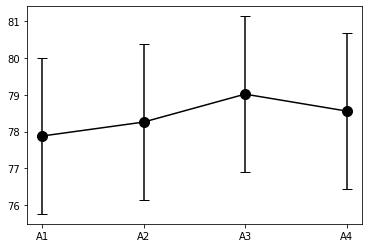

In [141]:
import matplotlib.pyplot as plt

alpha = 0.05

t_value = stats.t.ppf(1-alpha/2, nu_e)

df2 = pd.DataFrame(df.mean() ,columns=['mean'])
df2['upper'] = df2['mean'] + t_value*np.sqrt(Ve/len(df))
df2['lower'] = df2['mean'] - t_value*np.sqrt(Ve/len(df))

print(df2)

plt.errorbar(x=['A1','A2','A3','A4'], y=df2['mean'], yerr = t_value,
             capsize=5, fmt='-o', markersize=10, ecolor='black', markeredgecolor = "black", color='black');

In [172]:
for i, col1 in enumerate(df2.index):
    for j, col2 in enumerate(df2.index[i+1:]):
        j = j+i+1
        print('\nmu(',df2.index[i],')-mu(',df2.index[j],')')
        print('  ', df2.iloc[i, 0] - df2.iloc[j, 0])
        print('   lower:', df2.iloc[i, 0] - df2.iloc[j, 0]-t_value*np.sqrt((1/len(df)+1/len(df))*Ve))
        print('   upper:', df2.iloc[i, 0] - df2.iloc[j, 0]+t_value*np.sqrt((1/len(df)+1/len(df))*Ve))


mu( A1 )-mu( A2 )
   -0.37999999999999545
   lower: -1.017735730713519
   upper: 0.2577357307135283

mu( A1 )-mu( A3 )
   -1.1400000000000148
   lower: -1.7777357307135384
   upper: -0.502264269286491

mu( A1 )-mu( A4 )
   -0.6799999999999926
   lower: -1.3177357307135162
   upper: -0.04226426928646887

mu( A2 )-mu( A3 )
   -0.7600000000000193
   lower: -1.397735730713543
   upper: -0.12226426928649559

mu( A2 )-mu( A4 )
   -0.29999999999999716
   lower: -0.9377357307135209
   upper: 0.3377357307135266

mu( A3 )-mu( A4 )
   0.46000000000002217
   lower: -0.17773573071350157
   upper: 1.0977357307135458


例えば、$\mu_3,\mu_4$の差の信頼区間が0を含むので、これらの平均に有意な差がないと結論できる。
#### 3つ以上の分散の一様性の検定
いくつかあるうち、パートレットの検定を説明する。
それは、各水準の不偏分散を
$$
V_i=\sum_i(y_{ij}-\bar{y}_{i・})^2/(r_i-1),\hspace{5mm}i=1,\cdots,a
$$
それらを併合したものを
$$
V_e = \sum_i(r_i-1)V_i/(n-a)=\sum_i\sum_j(y_{ij}-\bar{y}_{i・})^2/(n-a)
$$
とするとき($n=\sum_ir_i$)、
$$
B=(n-a)\log V_e-\sum_i(r_i-1)\log V_i
$$
、等分散仮説$H_0:\sigma_1^2=\sigma_2^2=\cdots =\sigma_a^2$のもとで近似的に自由度$a-1$の$\chi-2$分布に従うことを用いるものである。
このとき、$\chi^2$近似をよくするために
$$
B'=\frac{B}{1+\frac{1}{3(a-1)}\}\bigl\{\sum_i\frac{1}{r_i-1}-\frac{1}{n-a} \bigr\}}
$$
と補正する。

In [202]:
V = np.sum((df - df.mean())**2) / (len(df)-1)
Ve = np.sum(np.sum((df - df.mean())**2)) / (n-a)
print('Vi:\n',V)
print('Ve: ',Ve)

B = (n-a)*np.log(Ve) - (len(df)-1)*np.sum(np.log(V))
B_dash = B / (1+1/(3*(a-1)) * (4/(len(df)-1) - 1/(n-a)))
print('B:',B)
print('B_dash:',B_dash)

p_value = stats.chi2.pdf(B_dash, df=a-1)
print('p-value:',p_value)

Vi:
 A1    0.097
A2    0.413
A3    0.217
A4    0.178
dtype: float64
Ve:  0.22625000000000006
B: 2.10689142009274
B_dash: 1.9081280785745571
p-value: 0.21226044937842475


### 交互作用と要因実験
2値上の因子をとりあげる実験を一般に多因子実験と呼ぶ。
多因子実験の場合は、各因子の単独の効果(主効果)だけでなく、それらの組合せによる効果にも注意を払う必要がある。

    B1  B2
A1  30  50
A2  60  80
A3  70  90 

    B1  B2
A1  30  40
A2  60  90
A3  70  50


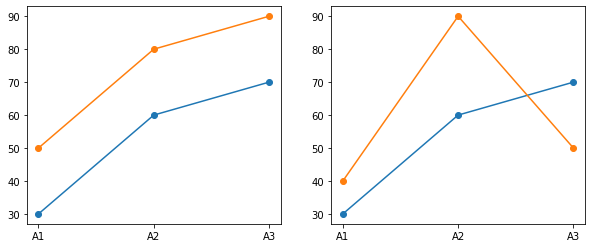

In [217]:
test1 = pd.DataFrame({'B1':[30,60,70], 'B2':[50,80,90]}, index=['A1','A2','A3'])
test2 = pd.DataFrame({'B1':[30,60,70], 'B2':[40,90,50]}, index=['A1','A2','A3'])
print(test1,'\n')
print(test2)

fig, ax = plt.subplots(1,2,figsize=(10,4))

ax[0].plot(test1['B1'], '-o');
ax[0].plot(test1['B2'], '-o');
ax[1].plot(test2['B1'], '-o');
ax[1].plot(test2['B2'], '-o');

左図の場合、$A_1B_1$から$A$を$A_2$に変更したときの増加分30と、$B$を$B_2$に変更したときの増加分20の和が、これらを同時に変更したときの増加分50に等しく、水準変更にともなう応答の変化に加法性が成立する。
このような場合、2因子$A,B$に交互作用が存在しないという。

一方、右図の場合、$A_1B_1$から$A$を$A_2$に変更したときの増加分30と、$B$を$B_2$に変更したときの増加分10の和40は、これらを同時に変更したときの増加分60に一致しない。
このような場合、2因子$A,B$に交互作用が存在するという。

### 2元配置分散分析
多因子要因実験を完全無作為法で行うとき、それを多元配置と呼び、2因子の場合を2元配置、3因子の場合を3元配置という。

In [236]:
test3 =pd.DataFrame({'B1':[76.0,73.2,77.1,75.0,75.7,74.7],
                     'B2':[76.2,79.8,84.5,80.7,81.3,76.9],
                     'B3':[75.3,79.9,86.5,83.1,80.7,83.4],
                     'B4':[70.4,72.4,76.9,78.1,77.1,82.0],
                     'index':['A1','A1','A2','A2','A3','A3']})
test3

,B1,B2,B3,B4,index
0,76.0,76.2,75.3,70.4,A1
1,73.2,79.8,79.9,72.4,A1
2,77.1,84.5,86.5,76.9,A2
3,75.0,80.7,83.1,78.1,A2
4,75.7,81.3,80.7,77.1,A3
5,74.7,76.9,83.4,82.0,A3


#### 2元配置のモデル
因子$A,B$の水準の組合せ$A_iB_j$での$k$番目の観測値を$y_{ijk}$とする。
なお、$A,B$の水準数をそれぞれ$a,b$とし、繰返し数は一定で$r=2$とする。(一定でないデータの分析は容易ではない)
次のモデルを想定する
$$
y_{ijk}=\mu_{ij}+\varepsilon_{ijk}
$$